In [ ]:
# default_exp util
from nbdev import *

In [ ]:
#hide
from nbdev.showdoc import *

# Utility

> Functions for loading, displaying, and saving images

In [ ]:
#export
import os

import torch
import torchvision.transforms as transforms

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

from pytorch_nst.config import device, imsize

loader = transforms.Compose([
    transforms.Resize(imsize),
    transforms.ToTensor()
])
unloader = transforms.ToPILImage()

plt.ion()

def image_loader(img):
    # Convert image to tensor, resize to appropriate size, and load it to device
    if not Image.isImageType(img):
        img = Image.open(img)
   
    img = loader(img).unsqueeze(0) # wrap image in tensor
    return img.to(device, torch.float)

def image_unloader(tensor):
    # Convert tensor back to a PIL image on the CPU
    image = tensor.cpu().clone()
    image = image.squeeze(0)
    return unloader(image)

def imshow(tensor, title=None):
    image = image_unloader(tensor)
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.pause(1)

def show_all_images(content, style, generated, title=None):
    c_image = image_unloader(content)
    s_image = image_unloader(style)
    g_image = image_unloader(generated)
    
    fig = plt.figure(figsize=(6,6))
    grid = plt.GridSpec(3,2)

    c_ax = fig.add_subplot(grid[-1,0])
    c_ax.axis('off')
    c_ax.imshow(c_image)
    c_ax.title.set_text("Content Image")

    s_ax = fig.add_subplot(grid[-1,1])
    s_ax.axis('off')
    s_ax.imshow(s_image)
    s_ax.title.set_text("Style Image")
    
    g_ax = fig.add_subplot(grid[0:2, :])
    g_ax.axis('off')
    g_ax.imshow(g_image)

    if title is not None:
        plt.title(title)

def save_image(tensor, filepath):
    Path(filepath).mkdir(parents=True, exist_ok=True)
    image = tensor_to_image(tensor)
    image.save(filepath)
    print(f'Saved image to {filepath}')

def random_img():
    return torch.rand(1, 3, imsize, imsize).to(device, torch.float)


# Usage

In [ ]:
show_doc(image_loader)
show_doc(image_unloader)
show_doc(imshow)
show_doc(show_all_images)
show_doc(save_image)
show_doc(random_img)

<h4 id="image_loader" class="doc_header"><code>image_loader</code><a href="__main__.py#L22" class="source_link" style="float:right">[source]</a></h4>

> <code>image_loader</code>(**`img`**)



<h4 id="image_unloader" class="doc_header"><code>image_unloader</code><a href="__main__.py#L30" class="source_link" style="float:right">[source]</a></h4>

> <code>image_unloader</code>(**`tensor`**)



<h4 id="imshow" class="doc_header"><code>imshow</code><a href="__main__.py#L36" class="source_link" style="float:right">[source]</a></h4>

> <code>imshow</code>(**`tensor`**, **`title`**=*`None`*)



<h4 id="show_all_images" class="doc_header"><code>show_all_images</code><a href="__main__.py#L43" class="source_link" style="float:right">[source]</a></h4>

> <code>show_all_images</code>(**`content`**, **`style`**, **`generated`**, **`title`**=*`None`*)



<h4 id="save_image" class="doc_header"><code>save_image</code><a href="__main__.py#L68" class="source_link" style="float:right">[source]</a></h4>

> <code>save_image</code>(**`tensor`**, **`filepath`**)



<h4 id="random_img" class="doc_header"><code>random_img</code><a href="__main__.py#L74" class="source_link" style="float:right">[source]</a></h4>

> <code>random_img</code>()



In [ ]:
# Generate a random torch image

t_img = random_img()

assert t_img.size() == torch.Size([1, 3, imsize, imsize]) # imsize is set in config

# convert to PIL Image

p_img = image_unloader(t_img)

assert Image.isImageType(p_img)

# convert back to Tensor

t_img2 = image_loader(p_img)

# Some precision is lost when converting from float to RGB back to float
assert torch.all(torch.isclose(t_img, t_img2, atol=1e-2))

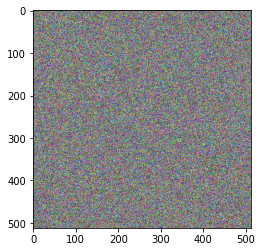

In [ ]:
imshow(t_img)

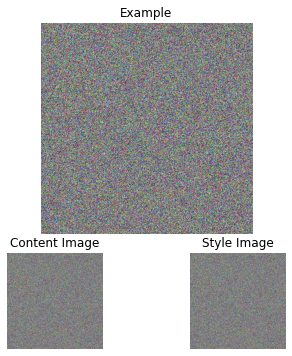

In [ ]:
show_all_images(t_img, t_img, t_img2, title="Example")